<a href="https://colab.research.google.com/github/Pancholeon/Portafolio_Python/blob/main/Salaries_by_College_Major_Analysis_(_An%C3%A1lisis_descriptivo%2C_discriminante_lineal_y_discriminante_cuadr%C3%A1tico_)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A continuación, exploraremos los salarios asociados a diferentes carreras, considerando la mediana del salario inicial, el salario promedio a mitad de la carrera profesional, el décimo percentil y el nonagésimo percentil de salario durante la mitad de la carrera profesional. Además, categorizaremos estas carreras en grupos según sus características.

Iniciamos con un análisis exploratorio del dataframe, buscando identificar la existencia de NA, NaN o celdas vacías.

In [352]:
import pandas as pd
df = pd.read_csv('salaries_by_college_major.csv')
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from scipy.stats import shapiro
pd.options.display.float_format = '{:,.2f}'.format

In [319]:
df.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 90th Percentile Salary,Group
0,Accounting,"46,000.00","77,100.00","42,200.00","152,000.00",Business
1,Aerospace Engineering,"57,700.00","101,000.00","64,300.00","161,000.00",STEM
2,Agriculture,"42,600.00","71,900.00","36,300.00","150,000.00",Business
3,Anthropology,"36,800.00","61,500.00","33,800.00","138,000.00",HASS
4,Architecture,"41,600.00","76,800.00","50,600.00","136,000.00",Business


In [320]:
df.shape

(51, 6)

In [321]:
df.columns

Index(['Undergraduate Major', 'Starting Median Salary',
       'Mid-Career Median Salary', 'Mid-Career 10th Percentile Salary',
       'Mid-Career 90th Percentile Salary', 'Group'],
      dtype='object')

In [322]:
df.isna().sum()

Undergraduate Major                  0
Starting Median Salary               1
Mid-Career Median Salary             1
Mid-Career 10th Percentile Salary    1
Mid-Career 90th Percentile Salary    1
Group                                1
dtype: int64

In [323]:
df.tail()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 90th Percentile Salary,Group
46,Psychology,"35,900.00","60,400.00","31,600.00","127,000.00",HASS
47,Religion,"34,100.00","52,000.00","29,700.00","96,400.00",HASS
48,Sociology,"36,500.00","58,200.00","30,700.00","118,000.00",HASS
49,Spanish,"34,000.00","53,100.00","31,000.00","96,400.00",HASS
50,Source: PayScale Inc.,NaN,NaN,NaN,NaN,NaN


In [324]:
clean_df = df.dropna()
clean_df.tail()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 90th Percentile Salary,Group
45,Political Science,"40,800.00","78,200.00","41,200.00","168,000.00",HASS
46,Psychology,"35,900.00","60,400.00","31,600.00","127,000.00",HASS
47,Religion,"34,100.00","52,000.00","29,700.00","96,400.00",HASS
48,Sociology,"36,500.00","58,200.00","30,700.00","118,000.00",HASS
49,Spanish,"34,000.00","53,100.00","31,000.00","96,400.00",HASS


In [325]:
clean_df['Starting Median Salary'].idxmax()

43

In [326]:
clean_df['Undergraduate Major'].loc[43]

'Physician Assistant'

In [327]:
clean_df.loc[43]

Undergraduate Major                  Physician Assistant
Starting Median Salary                         74,300.00
Mid-Career Median Salary                       91,700.00
Mid-Career 10th Percentile Salary              66,400.00
Mid-Career 90th Percentile Salary             124,000.00
Group                                               STEM
Name: 43, dtype: object

Observamos que la carrera con mayor salario mediano al inicio de su carrera profesional es de asistente médico correspondiente a la carrera STEM.

What college major has the highest mid-career salary? How much do graduates with this major earn? (Mid-career is defined as having 10+ years of experience).

In [328]:
clean_df['Mid-Career Median Salary'].idxmax()

8

In [329]:
clean_df.loc[8]

Undergraduate Major                  Chemical Engineering
Starting Median Salary                          63,200.00
Mid-Career Median Salary                       107,000.00
Mid-Career 10th Percentile Salary               71,900.00
Mid-Career 90th Percentile Salary              194,000.00
Group                                                STEM
Name: 8, dtype: object

Por su parte, se observa que el máximo salario a mitad de de la carrera profesional lo obtiene el ingeniero en química con un salario de más de 100 mil dolares.

Which college major has the lowest starting salary and how much do graduates earn after university?

In [330]:
clean_df['Starting Median Salary'].idxmin()

49

In [331]:
clean_df.loc[49]

Undergraduate Major                   Spanish
Starting Median Salary              34,000.00
Mid-Career Median Salary            53,100.00
Mid-Career 10th Percentile Salary   31,000.00
Mid-Career 90th Percentile Salary   96,400.00
Group                                    HASS
Name: 49, dtype: object

En contraparte, la profesión que tiene la menor mediana salarial inicial es el major de español con solamente 34 mil dolares por año.

Which college major has the lowest mid-career salary and how much can people expect to earn with this degree?

In [332]:
clean_df['Mid-Career Median Salary'].idxmin()

18

In [333]:
clean_df.loc[18]

Undergraduate Major                  Education
Starting Median Salary               34,900.00
Mid-Career Median Salary             52,000.00
Mid-Career 10th Percentile Salary    29,300.00
Mid-Career 90th Percentile Salary   102,000.00
Group                                     HASS
Name: 18, dtype: object

El major con el menor ingreso salarial a mitad de carrera profesional es el major de educación teniendo una media salarial a mitad de carrera profesional de 52 mil dolares anuales. Lo interesante resulta que lo máximo a lo que pueden aspirar, de acuerdo con este estudio, es a un poco más de 100 mil dolares anuales.

In [334]:
spread_col = clean_df['Mid-Career 90th Percentile Salary'] - clean_df['Mid-Career 10th Percentile Salary']
clean_df.insert(1, 'Spread', spread_col)
clean_df.head()

,Undergraduate Major,Spread,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 90th Percentile Salary,Group
0,Accounting,"109,800.00","46,000.00","77,100.00","42,200.00","152,000.00",Business
1,Aerospace Engineering,"96,700.00","57,700.00","101,000.00","64,300.00","161,000.00",STEM
2,Agriculture,"113,700.00","42,600.00","71,900.00","36,300.00","150,000.00",Business
3,Anthropology,"104,200.00","36,800.00","61,500.00","33,800.00","138,000.00",HASS
4,Architecture,"85,400.00","41,600.00","76,800.00","50,600.00","136,000.00",Business


Como parte del análisis, se transformó el dataframe con la incorporación de la variable spread, que significa la diferencia que existe entre el percentil 90 y el percencil 10, lo que nos da a conocer la diferencia salarial que existe entre estos dos percentiles.

In [335]:
low_risk = clean_df.sort_values('Spread')
low_risk[['Undergraduate Major', 'Spread']].head()

,Undergraduate Major,Spread
40,Nursing,"50,700.00"
43,Physician Assistant,"57,600.00"
41,Nutrition,"65,300.00"
49,Spanish,"65,400.00"
27,Health Care Administration,"66,400.00"


Using the .sort_values() method, can you find the degrees with the highest potential? Find the top 5 degrees with the highest values in the 90th percentile.

Also, find the degrees with the greatest spread in salaries. Which majors have the largest difference between high and low earners after graduation.

In [336]:
highest_potential = clean_df.sort_values('Mid-Career 90th Percentile Salary', ascending=False)
highest_potential[['Undergraduate Major', 'Mid-Career 90th Percentile Salary']].head()

,Undergraduate Major,Mid-Career 90th Percentile Salary
17,Economics,"210,000.00"
22,Finance,"195,000.00"
8,Chemical Engineering,"194,000.00"
37,Math,"183,000.00"
44,Physics,"178,000.00"


Se observa que los major con mayor valor en el percentil 90 son economía, finanzas, ingeniería quimica, matemáticas y física, teniendo salarios por encima de los 170 mil dolares anuales.

In [337]:
larger_diff = clean_df.sort_values('Spread',ascending=False).head(5)
larger_diff

,Undergraduate Major,Spread,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 90th Percentile Salary,Group
17,Economics,"159,400.00","50,100.00","98,600.00","50,600.00","210,000.00",Business
22,Finance,"147,800.00","47,900.00","88,300.00","47,200.00","195,000.00",Business
37,Math,"137,800.00","45,400.00","92,400.00","45,200.00","183,000.00",STEM
36,Marketing,"132,900.00","40,800.00","79,600.00","42,100.00","175,000.00",Business
42,Philosophy,"132,500.00","39,900.00","81,200.00","35,500.00","168,000.00",HASS


In [338]:
clean_df.groupby('Group').mean()

<ipython-input-338-61aa9b47bd8a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  clean_df.groupby('Group').mean()


,Spread,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 90th Percentile Salary
Group,,,,,
Business,"103,958.33","44,633.33","75,083.33","43,566.67","147,525.00"
HASS,"95,218.18","37,186.36","62,968.18","34,145.45","129,363.64"
STEM,"101,600.00","53,862.50","90,812.50","56,025.00","157,625.00"


Por últmo, se realiza una agrupación por grupos para realizar el cálculo de la media para cada uno de los grupos; se observa que los majors relacionados al grupo STEM tienen una media superior a los otros dos grupos. Dicha información puede servir para poner en contexto numérico sobre cada una de las profesiones en el ámbito laboral.

# Análisis discriminante con Python
Para finalizar con el ejercicio, utilizaré la técnica estadística "Análisis discriminante" para encontrar la combinación lineal de las variables predictoras que maximicen la separación entre dos o más grupos en un conjunto de datos.

##Revisión de supuestos

### Normalidad de las distribuciones

In [339]:
# Define las categorías correctamente
categorias = ['Business', 'STEM', 'HASS']

# Asigna valores numéricos basados en las categorías
clean_df['Group'] = clean_df['Group'].apply(lambda x: categorias.index(x))


<ipython-input-339-933430c2e044>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Group'] = clean_df['Group'].apply(lambda x: categorias.index(x))


In [340]:
#Se crean las variables X , y para utilizar la función lda incorporada en la paquetería scipy
X = clean_df[['Spread','Starting Median Salary','Mid-Career Median Salary','Mid-Career 10th Percentile Salary','Mid-Career 90th Percentile Salary']]
y = pd.array(clean_df.Group)

In [341]:
clean_df.head()

,Undergraduate Major,Spread,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 90th Percentile Salary,Group
0,Accounting,"109,800.00","46,000.00","77,100.00","42,200.00","152,000.00",0
1,Aerospace Engineering,"96,700.00","57,700.00","101,000.00","64,300.00","161,000.00",1
2,Agriculture,"113,700.00","42,600.00","71,900.00","36,300.00","150,000.00",0
3,Anthropology,"104,200.00","36,800.00","61,500.00","33,800.00","138,000.00",2
4,Architecture,"85,400.00","41,600.00","76,800.00","50,600.00","136,000.00",0


In [342]:
class_names = ['Business', 'STEM', 'HASS']

# Inicializa una lista para almacenar los resultados
results = []

for i, class_name in enumerate(class_names):
    # Selecciona los datos de la clase actual
    class_data = X[y == i]

    # Realiza la prueba de normalidad de Shapiro-Wilk
    stat, p = shapiro(class_data)

    # Almacena el resultado en la lista de resultados
    results.append((class_name, stat, p))

for class_name, stat, p in results:
    if p > 0.05:
        print(f"Clase {class_name}: La muestra parece seguir una distribución normal")
    else:
        print(f"Clase {class_name}: La muestra no sigue una distribución normal")


Clase Business: La muestra no sigue una distribución normal
Clase STEM: La muestra no sigue una distribución normal
Clase HASS: La muestra no sigue una distribución normal


Se observa que la distribución de las variables predictoras dentro de cada una de las categorías no sigue una distribución normal, según los resultados de la prueba de normalidad de Shapiro-Wilk. Esto sugiere que las variables en cada clase no se distribuyen de manera gaussiana. Es importante tener en cuenta que el Análisis Discriminante Lineal (LDA) asume normalidad en las distribuciones y, por lo tanto, este supuesto no se cumple completamente en nuestros datos. Se puede sugerir una transformación de las variables predictoras a fin de lograr una distribución más cercana a la normalidad o en su defecto, visualizar si realizando un análisis determinante quadrático resulta tener mejores resultados de acuerdo con las métricas establecidas.

### Homogeneidad de las varianzas

In [343]:
from scipy.stats import bartlett

# Ejemplo de prueba de igualdad de matrices de covarianza
cov_matrix_class_0 = np.cov(X[y == 0].T)  # Matriz de covarianza para la clase 0
cov_matrix_class_1 = np.cov(X[y == 1].T)  # Matriz de covarianza para la clase 1
cov_matrix_class_2 = np.cov(X[y == 2].T)  # Matriz de covarianza para la clase 1
stat, p = bartlett(cov_matrix_class_0.flatten(), cov_matrix_class_1.flatten(),cov_matrix_class_2.flatten())
if p > 0.05:
    print("Las matrices de covarianza son aproximadamente iguales")
else:
    print("Las matrices de covarianza no son iguales")

Las matrices de covarianza no son iguales


De igual manera, se observa que las matrices de covarianza son diferentes entre las clases, lo que sugiere que el LDA lineal estándar puede no ser la mejor opción. En lugar de LDA lineal,  se pueden considerar otras variantes del LDA o técnicas alternativas que manejen matrices de covarianza heterogéneas, como el Análisis Discriminante Cuadrático (QDA).

### Independencia de las variables

In [344]:
correlation_matrix_class_0 = np.corrcoef(X[y == 0].T)
correlation_matrix_class_1 = np.corrcoef(X[y == 1].T)
correlation_matrix_class_2 = np.corrcoef(X[y == 2].T)

In [345]:
correlation_matrix_class_0

array([[1.        , 0.22759097, 0.83041925, 0.29778399, 0.98297805],
       [0.22759097, 1.        , 0.62054387, 0.76529508, 0.35795787],
       [0.83041925, 0.62054387, 1.        , 0.74242752, 0.91157596],
       [0.29778399, 0.76529508, 0.74242752, 1.        , 0.46810324],
       [0.98297805, 0.35795787, 0.91157596, 0.46810324, 1.        ]])

In [346]:
correlation_matrix_class_1

array([[ 1.        , -0.43858558,  0.18857064, -0.209329  ,  0.83298833],
       [-0.43858558,  1.        ,  0.71547573,  0.88029602,  0.08081019],
       [ 0.18857064,  0.71547573,  1.        ,  0.87372269,  0.67378745],
       [-0.209329  ,  0.88029602,  0.87372269,  1.        ,  0.36666394],
       [ 0.83298833,  0.08081019,  0.67378745,  0.36666394,  1.        ]])

In [347]:
correlation_matrix_class_2

array([[1.        , 0.55253272, 0.81830468, 0.46151232, 0.98830801],
       [0.55253272, 1.        , 0.75527748, 0.6703305 , 0.61745473],
       [0.81830468, 0.75527748, 1.        , 0.62899978, 0.85193492],
       [0.46151232, 0.6703305 , 0.62899978, 1.        , 0.59137812],
       [0.98830801, 0.61745473, 0.85193492, 0.59137812, 1.        ]])

### Modelo LDA en implementación.

In [348]:
# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creamos un modelo de Análisis Discriminante Lineal (LDA)
lda = LinearDiscriminantAnalysis()

# Ajustamos el modelo a los datos de entrenamiento
lda.fit(X_train, y_train)

# Realizamos predicciones en los datos de prueba
y_pred = lda.predict(X_test)

# Evaluamos el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy}")

# También puedes obtener los coeficientes del discriminante lineal
coeficientes = lda.coef_
print(f"Coeficientes del discriminante lineal: {coeficientes}")

Precisión del modelo: 0.7333333333333333
Coeficientes del discriminante lineal: [[ 2.33519337e-05  1.44983991e-04 -1.12486654e-04 -8.95926612e-06
   1.94682525e-05]
 [-4.35332528e-05 -1.21343065e-04  1.88255216e-04  1.86861833e-04
  -2.30809005e-05]
 [ 9.89249616e-06 -2.23595206e-05 -3.55894005e-05 -9.95102399e-05
   8.15348735e-07]]


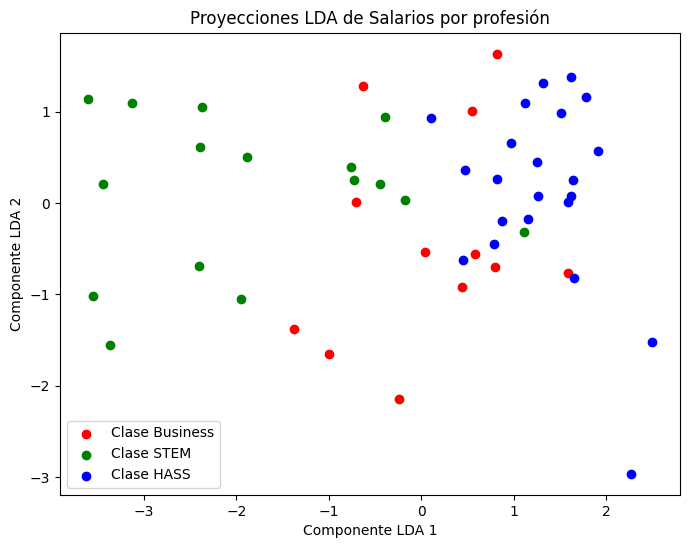

In [349]:
# Ajustar el modelo a los datos
X_lda = lda.fit_transform(X, y)

# Definir colores para cada clase
colores = ['red', 'green', 'blue']

# Crear un gráfico de dispersión de las proyecciones LDA con colores por clase
plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y))):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], c=colores[i], label=f'Clase {categorias[i]}', marker='o')

plt.title('Proyecciones LDA de Salarios por profesión')
plt.xlabel('Componente LDA 1')
plt.ylabel('Componente LDA 2')
plt.legend()
plt.show()

Se observa que el análisis de discriminación, a través del discriminante lineal, es capaz de categorizar efectivamente las variables en estudio. En particular, los criterios de decisión del discriminante lineal logran una correcta identificación del 73% de las observaciones seleccionadas en la variable de entrenamiento. A pesar de que no se cumplieron todos los supuestos teóricos, este resultado sugiere un rendimiento satisfactorio del algoritmo en la prueba realizada.

## Modelo QDA en implementación.

In [353]:
# Crear un modelo de Análisis Discriminante Cuadrático (QDA)
qda = QuadraticDiscriminantAnalysis()

# Ajustar el modelo a los datos de entrenamiento
qda.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred_qda = qda.predict(X_test)

# Evaluar el rendimiento del modelo QDA
accuracy_qda = accuracy_score(y_test, y_pred_qda)
print(f"Precisión del modelo QDA: {accuracy_qda}")

Precisión del modelo QDA: 0.6


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Finalmente, al emplear el discriminante cuadrático, se observa una disminución del rendimiento del modelo en un 10%, con una exactitud del 60% en los datos de prueba. En conclusión, para mejorar el rendimiento de ambos modelos, se podría considerar la transformación de las variables con el objetivo de acercarlas a una distribución normal, lo que ayudaría a cumplir con los supuestos teóricos subyacentes.